In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentimentdataset.csv


In [2]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [3]:
df = pd.read_csv("../input/sentimentdataset.csv")
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "Platform", "Country",  "Timestamp", "User", "Year", "Month", "Day", "Hour"], inplace=True)
df.head()

,Text,Sentiment,Hashtags,Retweets,Likes
0,Enjoying a beautiful day at the park! ...,Positive,#Nature #Park,15.0,30.0
1,Traffic was terrible this morning. ...,Negative,#Traffic #Morning,5.0,10.0
2,Just finished an amazing workout! 💪 ...,Positive,#Fitness #Workout,20.0,40.0
3,Excited about the upcoming weekend getaway! ...,Positive,#Travel #Adventure,8.0,15.0
4,Trying out a new recipe for dinner tonight. ...,Neutral,#Cooking #Food,12.0,25.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Hashtags   732 non-null    object 
 3   Retweets   732 non-null    float64
 4   Likes      732 non-null    float64
dtypes: float64(2), object(3)
memory usage: 28.7+ KB


In [5]:
print("No. of Unique sentiments:", len(df["Sentiment"].unique()))

No. of Unique sentiments: 279


In [6]:
# df["Text"] = [row.strip() for row in df["Text"]]
# df["Hashtags"] = [row.strip() for row in df["Hashtags"]]

# Combining the main text & associated hashtags

In [7]:
df["Text"] = df["Text"] + df["Hashtags"]
df.drop(columns="Hashtags", inplace=True)
df.head()

,Text,Sentiment,Retweets,Likes
0,Enjoying a beautiful day at the park! ...,Positive,15.0,30.0
1,Traffic was terrible this morning. ...,Negative,5.0,10.0
2,Just finished an amazing workout! 💪 ...,Positive,20.0,40.0
3,Excited about the upcoming weekend getaway! ...,Positive,8.0,15.0
4,Trying out a new recipe for dinner tonight. ...,Neutral,12.0,25.0


# Text Preprocessing

In [8]:
corpus = []
lemmatizer = WordNetLemmatizer()

for document in df["Text"]:
    document = re.sub("[^a-zA-Z]", " ", document).lower()
    document = document.split()
    document = [lemmatizer.lemmatize(word) for word in document if word not in set(stopwords.words("english"))]
    document = " ".join(document)
    corpus.append(document)

df["Text"] = corpus

In [9]:
df.head()

,Text,Sentiment,Retweets,Likes
0,enjoying beautiful day park nature park,Positive,15.0,30.0
1,traffic terrible morning traffic morning,Negative,5.0,10.0
2,finished amazing workout fitness workout,Positive,20.0,40.0
3,excited upcoming weekend getaway travel adventure,Positive,8.0,15.0
4,trying new recipe dinner tonight cooking food,Neutral,12.0,25.0


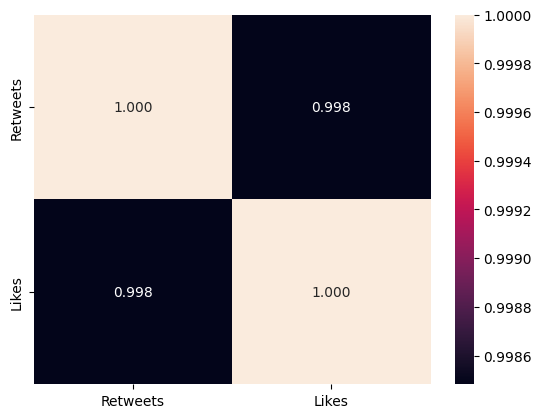

In [10]:
retweets_likes = df[["Retweets", "Likes"]]
corr = retweets_likes.corr()
sns.heatmap(corr, annot=True, fmt=".3f")
plt.show()

# TF-IDF Vectorization

In [11]:
y = df["Sentiment"]
vectorizer = TfidfVectorizer()
X = pd.DataFrame(vectorizer.fit_transform(df["Text"]).toarray(), columns=vectorizer.get_feature_names_out())
X.head()

,ablaze,abstract,abstractart,abyss,abyssofheartache,academic,academicfrustration,acceptance,accepts,accidentally,...,yearning,yearningforconnection,yet,york,young,zen,zenwisdom,zero,zest,zestful
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***SDG Classifier -90.5***

In [12]:
text = df['Text'].tolist()
label = df['Sentiment']
sentences = [sent.strip().split() for sent in text]
sentences[:5]

[['enjoying', 'beautiful', 'day', 'park', 'nature', 'park'],
 ['traffic', 'terrible', 'morning', 'traffic', 'morning'],
 ['finished', 'amazing', 'workout', 'fitness', 'workout'],
 ['excited', 'upcoming', 'weekend', 'getaway', 'travel', 'adventure'],
 ['trying', 'new', 'recipe', 'dinner', 'tonight', 'cooking', 'food']]

In [13]:
from gensim.models import Word2Vec, KeyedVectors

cbow_model = Word2Vec(sentences=sentences,
                     vector_size=100,
                     min_count=1,
                     window=2,
                     workers=4)
cbow_model.train(sentences, total_examples=len(sentences), epochs=100)

(728484, 741900)

In [14]:
cbow_model.wv['beautiful']

array([-1.55544743e-01,  1.73173219e-01,  1.75987408e-02, -1.62220094e-02,
        3.37394714e-01, -3.73802841e-01,  2.34211981e-01,  1.21900827e-01,
       -3.08267772e-01, -4.99667451e-02, -6.50299415e-02, -4.02124166e-01,
        3.35355327e-02,  3.12502980e-02, -2.37425677e-02, -1.76984876e-01,
        2.58419871e-01, -4.54861611e-01, -2.06324682e-01, -3.55779290e-01,
        1.59147397e-01, -1.99142061e-02,  3.20282251e-01, -4.93835248e-02,
       -1.33564427e-01,  3.29390056e-02, -1.85840577e-01,  1.50847107e-01,
       -1.30416960e-01,  8.14677849e-02,  4.46529627e-01,  7.18431920e-02,
       -2.67705023e-01, -2.17874274e-01, -1.62363514e-01,  5.27012765e-01,
        6.12953082e-02, -6.74594892e-04, -8.43051374e-02, -7.49505699e-01,
        5.03648371e-02, -2.57835805e-01,  7.80586302e-02,  6.57226592e-02,
        2.83789635e-01,  4.30762172e-02, -2.94562936e-01, -2.95341700e-01,
        2.21799061e-01,  2.25182131e-01,  2.27256596e-01, -1.65342063e-01,
       -2.37936750e-01, -

In [15]:
def get_sentence_embedding(sent):
    #['Enjoying', 'a', 'beautiful', 'day', 'at', 'the', 'park!']
    list_vectors = []
    for word in sent:
        vector = cbow_model.wv[word]
        list_vectors.append(vector)
    mean_vector = np.array(list_vectors).mean(axis=0)
    return mean_vector
vectors = []
for sent in sentences:
    vector = get_sentence_embedding(sent)
    vectors.append(vector)

features = np.array(vectors)
len(label.value_counts())

279

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label_encoded = le.fit_transform(label)
label_encoded
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=1434)

features_resampled, label_resampled = sampler.fit_resample(features, label_encoded)
features_resampled.shape, label_resampled.shape

((12276, 100), (12276,))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_resampled,
                                                    label_resampled,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=label_resampled)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

model = SGDClassifier(loss='log_loss')
model.fit(X_train, y_train)
print(f'Train {model.score(X_train, y_train)}')
print(f'Test {model.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, features_resampled, label_resampled, cv=10, n_jobs=-1)
print(scores)
print(f" Average Score {np.mean(scores)}")

Train 0.9017311608961304
Test 0.9120521172638436
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       0.67      1.00      0.80         4
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         4
           8       1.00      0.60      0.75         5
           9       1.00      1.00      1.00         4
          10       0.57      1.00      0.73         4
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         4
          13       0.00      0.00      0.00         5
          14       0.67      1.00      0.80         4
          15       0.00      0.00      0.00         3
          16       1.00      1.0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.89983713 0.90472313 0.89820847 0.90390879 0.9014658  0.88436482
 0.9005705  0.9005705  0.89649552 0.89486553]
 Average Score 0.8985010180812288


In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.62      1.00      0.77         5
           2       1.00      1.00      1.00         6
           3       0.67      1.00      0.80         4
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       0.43      1.00      0.60         3
           7       1.00      1.00      1.00         4
           8       0.75      0.60      0.67         5
           9       1.00      1.00      1.00         4
          10       0.57      1.00      0.73         4
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         5
          14       0.80      1.00      0.89         4
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         4
          17       1.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, features_resampled, label_resampled, cv=10, n_jobs=-1)
print(scores)
print(f" Average Score {np.mean(scores)}")

[0.88680782 0.88599349 0.8762215  0.89250814 0.88355049 0.90553746
 0.91198044 0.9005705  0.89160554 0.89405053]
 Average Score 0.8928825901473099


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# # Split the data into training, validation, and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features_resampled,
#                                                     label_resampled,
#                                                     test_size=0.2,
#                                                     random_state=42,
#                                                     shuffle=True,
#                                                     stratify=label_resampled)

# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=60, random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_val, rf_model.predict(X_val))
print(f'Random Forest Validation Accuracy: {rf_accuracy}')




Random Forest Validation Accuracy: 0.991042345276873


In [19]:
# Support Vector Classifier
svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train, y_train)
svc_accuracy = accuracy_score(y_val, svc_model.predict(X_val))
print(f'Support Vector Machine Validation Accuracy: {svc_accuracy}')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


Support Vector Machine Validation Accuracy: 0.9193811074918566


In [20]:
# Passive Aggressive Classifier
pa_model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
pa_model.fit(X_train, y_train)
pa_accuracy = accuracy_score(y_val, pa_model.predict(X_val))
print(f'Passive Aggressive Classifier Validation Accuracy: {pa_accuracy}')



Passive Aggressive Classifier Validation Accuracy: 0.9429967426710097


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data to ensure non-negative values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Now you can train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_scaled, y_train)
nb_accuracy = accuracy_score(y_val, nb_model.predict(X_val_scaled))
print(f'Multi Nominal Naive Bayes Validation Accuracy: {nb_accuracy}')


Multi Nominal Naive Bayes Validation Accuracy: 0.8232899022801303


In [ ]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_accuracy = accuracy_score(y_val, gb_model.predict(X_val_scaled))
print(f'Gradient Boosting Validation Accuracy: {gb_accuracy}')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv("../input/sentimentdataset.csv")
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "Platform", "Country",  "Timestamp", "User", "Year", "Month", "Day", "Hour"], inplace=True)
df.head()
df["Text"] = df["Text"] + df["Hashtags"]
df.drop(columns="Hashtags", inplace=True)
df.head()
corpus = []
lemmatizer = WordNetLemmatizer()

for document in df["Text"]:
    document = re.sub("[^a-zA-Z]", " ", document).lower()
    document = document.split()
    document = [lemmatizer.lemmatize(word) for word in document if word not in set(stopwords.words("english"))]
    document = " ".join(document)
    corpus.append(document)

df["Text"] = corpus
y = df["Sentiment"]
vectorizer = TfidfVectorizer()
X = pd.DataFrame(vectorizer.fit_transform(df["Text"]).toarray(), columns=vectorizer.get_feature_names_out())
X.head()
text = df['Text'].tolist()
label = df['Sentiment']
sentences = [sent.strip().split() for sent in text]
sentences[:5]
from gensim.models import Word2Vec, KeyedVectors

cbow_model = Word2Vec(sentences=sentences,
                     vector_size=100,
                     min_count=1,
                     window=2,
                     workers=4)
cbow_model.train(sentences, total_examples=len(sentences), epochs=100)cbow_model.wv['beautiful']def get_sentence_embedding(sent):
    #['Enjoying', 'a', 'beautiful', 'day', 'at', 'the', 'park!']
    list_vectors = []
    for word in sent:
        vector = cbow_model.wv[word]
        list_vectors.append(vector)
    mean_vector = np.array(list_vectors).mean(axis=0)
    return mean_vector
vectors = []
for sent in sentences:
    vector = get_sentence_embedding(sent)
    vectors.append(vector)

features = np.array(vectors)
len(label.value_counts())from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label_encoded = le.fit_transform(label)
label_encoded
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=1434)

features_resampled, label_resampled = sampler.fit_resample(features, label_encoded)
features_resampled.shape, label_resampled.shapefrom sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_resampled,
                                                    label_resampled,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=label_resampled)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

model = SGDClassifier(loss='log_loss')
model.fit(X_train, y_train)
print(f'Train {model.score(X_train, y_train)}')
print(f'Test {model.score(X_test, y_test)}')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, features_resampled, label_resampled, cv=10, n_jobs=-1)
print(scores)
print(f" Average Score {np.mean(scores)}")